<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_Bartlett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import scipy

In [213]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [231]:
def generate_sample(n, low, high, num_vars=10):
    return np.sum(np.random.uniform(low, high, (n, num_vars)), axis=1) / num_vars

In [214]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabela(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  #population = range(1, 100)
  for i in range(1, k+1):
    tabela[f'col_{i}'] = treat_values(np.random.normal(loc=200, scale=50, size=n))

  return tabela

In [250]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabela(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  #population = range(1, 100)
  for i in range(1, k+1):
    tabela[f'col_{i}'] = treat_values(generate_sample(n, 10, 100))

  return tabela

In [251]:
tabela1 = criaTabela(3, 10)
print(tabela1)

   col_1  col_2  col_3
0   72.9   60.4   44.6
1   63.5   53.4   63.3
2   54.7   67.6   55.3
3   52.3   48.4   61.4
4   47.3   59.9   65.1
5   60.6   71.7   42.0
6   62.9   56.0   63.0
7   47.1   54.5   73.2
8   53.6   47.0   66.5
9   48.0   62.7   46.7


In [252]:
n = len(tabela1)
k = len(tabela1.columns)
N = n*k
print(n, k, N)

10 3 30


In [253]:
var = []
for i in range(1, len(tabela1.columns)+1):
  var.append(np.var(tabela1[f'col_{i}']))

print(var)

[64.98290000000001, 56.16239999999999, 98.8769]


In [254]:
dp = []
for i in range(1, len(tabela1.columns)+1):
  dp.append(np.std(tabela1[f'col_{i}']))

print(dp)

[8.061197181560566, 7.494157724521148, 9.943686439143182]


In [255]:
sum(var)

220.0222

varianciap = $S^2p$

In [256]:
varianciap = ((n-1)*(sum(var))) / (N-k)
print(varianciap)

73.34073333333333


In [257]:
logvarianciap = math.log(varianciap)

logs = []

for i in range(k):
  logs.append(math.log(var[i]))

print(logs)
print(logvarianciap)

[4.1741241583617565, 4.028247493847175, 4.593875642085238]
4.295116161684181


In [258]:
q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))
print(q)

0.8019107168253612


In [259]:
c = 1 + ((1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k))))
print(c)

1.0493827160493827


In [260]:
b = (q / c)
b

0.7641737419159325

In [261]:
# GRAU DE LIBERDADE: 2

'''
Quiquadc = scipy.stats.chi2.cdf(c, df=(k-1)) # valor seguindo a distribuição qui-quadrado
print(Quiquadc)
'''

'\nQuiquadc = scipy.stats.chi2.cdf(c, df=(k-1)) # valor seguindo a distribuição qui-quadrado\nprint(Quiquadc)\n'

In [262]:
# https://www.geeksforgeeks.org/how-to-perform-bartletts-test-in-python/

stat, p = scipy.stats.bartlett(tabela1['col_1'], tabela1['col_2'], tabela1['col_3'])
print(stat)
print(p)

0.7641737419159325
0.6824357667814824


In [263]:
# p = k-1 (grau de liberdade)

def bartlett_critico(p):
  if p <= 20:
    X2c = [0, 3.841, 5.991, 7.815, 9.488, 11.071, 12.592, 14.067, 15.507, 16.919, 18.307,
          19.675, 21.026, 22.362, 23.685, 24.996, 26.296, 27.587, 28.869, 30.144, 31.410]
    b_critico = X2c[p]
  else:
    pass

  return b_critico

In [264]:
b_critico = bartlett_critico(k-1)

In [265]:
if b > b_critico:
  print("As variâncias são significativamente diferentes")
else:
  print("As variâncias não são significativamente diferentes")

As variâncias não são significativamente diferentes


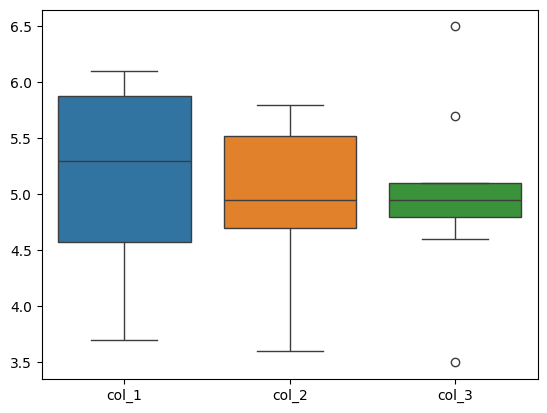

In [249]:
sns.boxplot(data = tabela1)
plt.show()

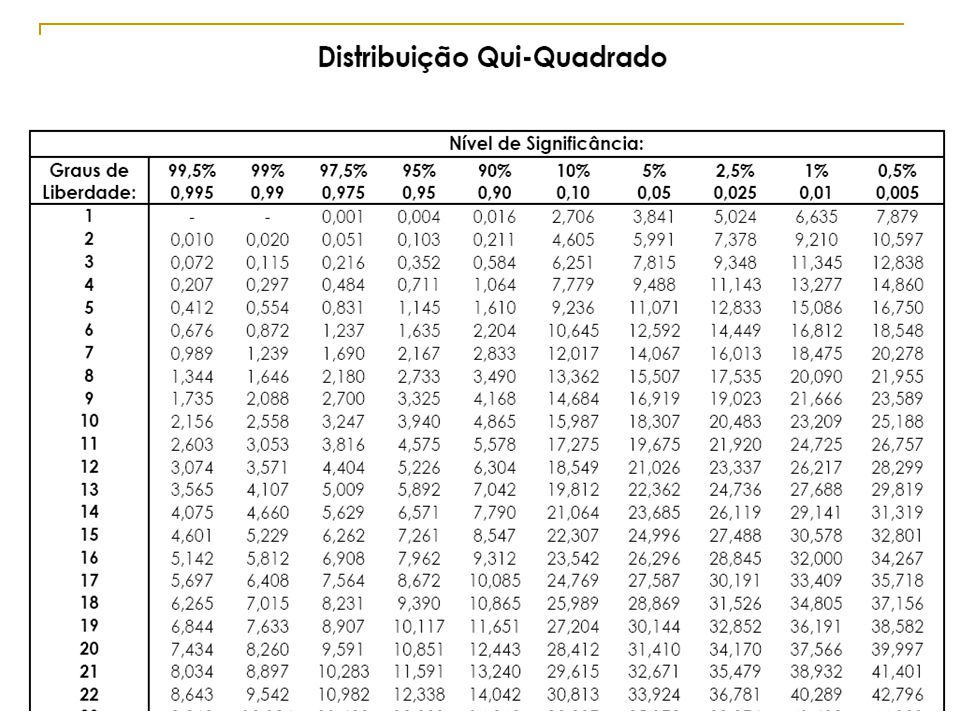